# Decision Trees

## Important Parameters

 - **Max Depth**: Controls the max number of nodes and layers of the tree and hence, the fitting of the model (prevent overfitting by choosing a moderate depth) Default: Until all leaves are pure or until all leaves contain less than 2 examples.

## Relevant Information: 
 - Decision trees are **not sensitive to feature scaling.**
 - Approx Complexity $O(NM \cdot \log(N))$ where $M$ number of attributes and $N$ the number of instances. 

## Implementation

We are going to work with the [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) Dataset

In [3]:
#Import usual libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#Import usual functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score

#Import utils
from utils.plot import confusion_matrix_custom

#Import required libraries and functions
from sklearn.datasets import load_iris, load_digits
from sklearn.tree import DecisionTreeClassifier


In [11]:
#Load the dataset 
digits = load_digits()
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df["target"] = digits.target
df.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Simple Use

In [12]:
#Divide the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.333, stratify = df["target"], random_state=666)
#Create the model
clf = DecisionTreeClassifier()
#Fit the data
clf.fit(X_train,y_train)
#Make a prediction
y_pred = clf.predict(X_test)


### Show Performance

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.74      0.80      0.77        61
           2       0.83      0.83      0.83        59
           3       0.73      0.74      0.73        61
           4       0.93      0.88      0.91        60
           5       0.89      0.89      0.89        61
           6       0.90      0.95      0.93        60
           7       0.94      0.83      0.88        60
           8       0.73      0.83      0.77        58
           9       0.75      0.72      0.74        60

    accuracy                           0.84       599
   macro avg       0.84      0.84      0.84       599
weighted avg       0.84      0.84      0.84       599



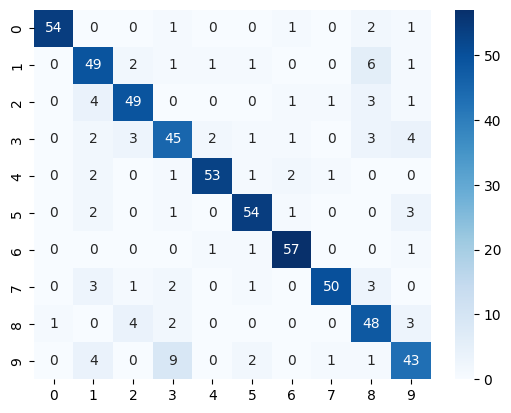

In [13]:
#Change of notation
y_real = y_test

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred)

#Showing performance with metrics
print(classification_report(y_real , y_pred))


### Showing max_depth effect

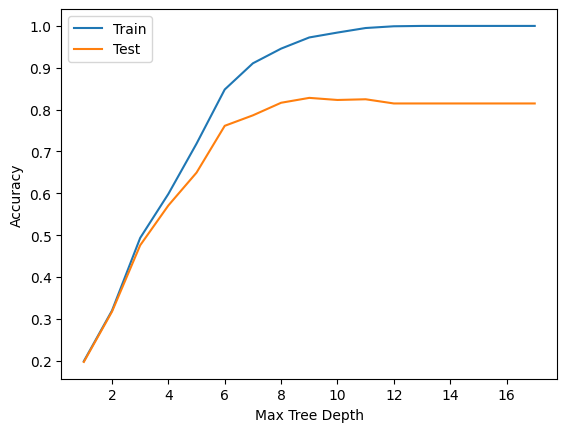

In [21]:
#Creating a list of max_depth options
max_depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
accuracy_train_list = []
accuracy_test_list = []

#Creating the models with fixed max_depth
for depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 666)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    accuracy_train_list.append(accuracy_score(y_train,y_pred_train))
    accuracy_test_list.append(accuracy_score(y_test,y_pred_test))

#Plotting
plt.plot(max_depth_list,accuracy_train_list,label = "Train")
plt.plot(max_depth_list,accuracy_test_list,label = "Test")
plt.legend()
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.savefig("img/max_depth_decision_tree.png", dpi = 300)